In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
transition_matrix: np.array = np.array(
   [ [1/2, 1/4, 1/5],
    [1/3, 1/2, 2/5],
    [1/6, 1/4, 2/5]]
)
transition_matrix

array([[0.5       , 0.25      , 0.2       ],
       [0.33333333, 0.5       , 0.4       ],
       [0.16666667, 0.25      , 0.4       ]])

In [3]:
assert np.sum(transition_matrix[:, 0]) == 1
assert np.sum(transition_matrix[:, 1]) == 1
assert np.sum(transition_matrix[:, 2]) == 1

AssertionError: 

In [4]:
np.sum(transition_matrix[:, 0])

0.9999999999999999

## Task 1.3
The following numerical decoding will be user
0 = sunny
1 = overcast
2 = rainy

The transition matrix P is constructed such that:
P(ij) is the probability that the weather changes from i to j where i is the weather today and j the weather tomorrow

In [5]:
trajectories: np.array = np.zeros((190, 31)).astype(int)
trajectories

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
## generate vectorized function
def step(x: np.array):
    probs: np.array = np.array(transition_matrix[:, x])
    random_number: float = np.random.uniform(0, 1)

    if random_number <= np.sum(probs[0]):
        return 0
    elif random_number <= np.sum(probs[0:2]):
        return 1
    else:
        return 2

vectorized_step  = np.vectorize(step)
## produce the simulation
for i in range(1, trajectories.shape[1]):
    x = trajectories[:, i-1]
    trajectories[:, i] = vectorized_step(x)

In [7]:
trajectories

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 2, 1, ..., 1, 2, 1],
       [0, 1, 2, ..., 0, 0, 2],
       ...,
       [0, 0, 0, ..., 0, 1, 2],
       [0, 1, 2, ..., 0, 2, 1],
       [0, 1, 1, ..., 0, 2, 2]])

In [32]:
day_2: np.array = trajectories[:, 2]
day_3: np.array = trajectories[:, 3]
day_30: np.array = trajectories[:, 30]

In [33]:
def plot_hist(x: np.array):
    count_0: np.array = np.count_nonzero(x == 0)
    count_1: np.array = np.count_nonzero(x == 1)
    count_2: np.array = np.count_nonzero(x == 2)

    p_0: float = round(count_0/len(x), 4)
    p_1: float = round(count_1/len(x), 4)
    p_2: float = round(count_2/len(x), 4)

    assert count_0 + count_1 + count_2 == len(x)
    x = ["Sunny", "Overcast", "Rainy"]
    y = [p_0, p_1, p_2]
    plt.bar(x, y)
    for i in range(3):
        plt.text(i, y[i], y[i], ha = 'center')

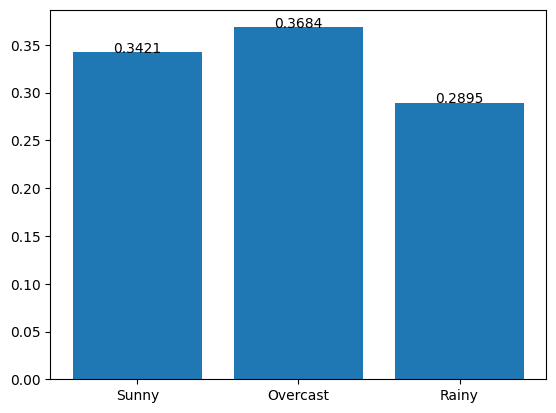

In [34]:
plot_hist(day_2)

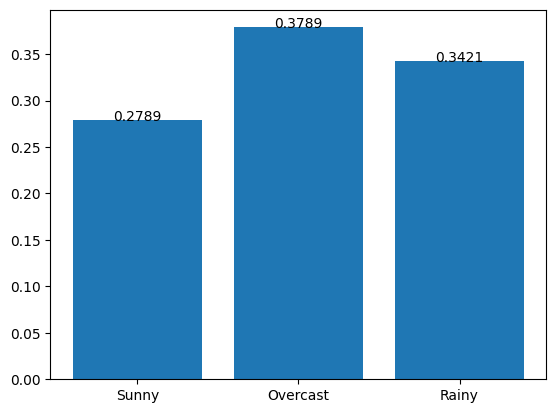

In [35]:
plot_hist(day_3)

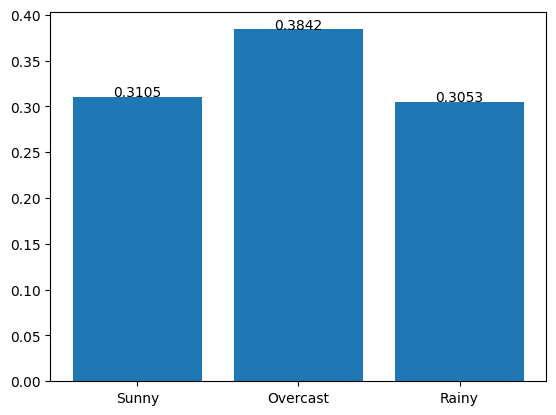

In [36]:
plot_hist(day_30)

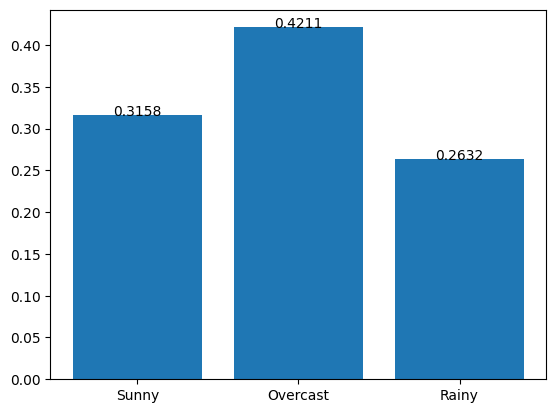

In [49]:
from typing import List

invariant_measure: List [float] = [round(6/19, 4), round(8/19, 4), round(5/19, 4)]
x: List [str] = ["Sunny", "Overcast", "Rainy"]
plt.bar(x, invariant_measure)
for i in range(3):
    plt.text(i, invariant_measure[i], invariant_measure[i], ha = 'center')

    # Task 1.5

In [37]:
count_sunny_day_2: np.array = np.count_nonzero(day_2 == 0)
count_overcast_day_2: np.array = np.count_nonzero(day_2 == 1) + count_sunny_day_2 * (2/3)
count_count_rainy_day_2: np.array = np.count_nonzero(day_2 == 2) + count_sunny_day_2 * (1/3)

p_rainy: float = count_count_rainy_day_2 / len(day_2)
p_overc: float = count_overcast_day_2 / len(day_2)

print(f"P: Rainy    = {p_rainy}")
print(f"P: Overcast = {p_overc}")

P: Rainy    = 0.40350877192982454
P: Overcast = 0.5964912280701754


## Task 1.6

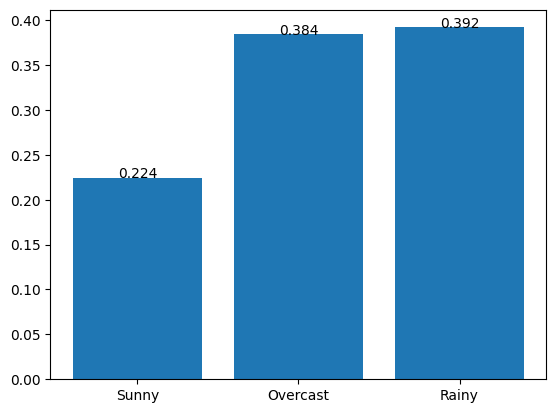

In [45]:
def plot_hist_no_sun(d_2: np.array, d_3: np.array):
    count_0: np.array = np.count_nonzero(d_3[d_2 != 0] == 0)
    count_1: np.array = np.count_nonzero(d_3[d_2 != 0] == 1)
    count_2: np.array = np.count_nonzero(d_3[d_2 != 0] == 2)

    p_0: float = round(count_0/(count_0 + count_1 + count_2), 4)
    p_1: float = round(count_1/(count_0 + count_1 + count_2), 4)
    p_2: float = round(count_2/(count_0 + count_1 + count_2), 4)


    x = ["Sunny", "Overcast", "Rainy"]
    y = [p_0, p_1, p_2]
    plt.bar(x, y)
    for i in range(3):
        plt.text(i, y[i], y[i], ha = 'center')

plot_hist_no_sun(day_2, day_3)

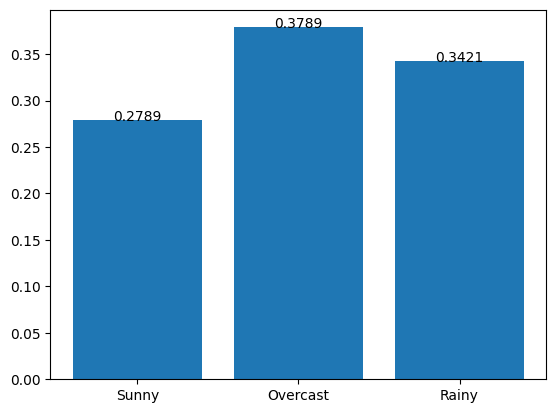

In [46]:
plot_hist(day_3)